In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [12]:
#Leer el documento con ayuda de la funcion read_csv
df = pd.read_csv("arizpe.txt", sep="\s+", skiprows=20,  engine='python',names=['Fecha', 'Precip', 'Evap', 'Tmax', 'Tmin'])
#Convertir el nulo a NA con replace
df.replace("Nulo","NA")

,Fecha,Precip,Evap,Tmax,Tmin
0,10/04/1961,0.0,NA,28,NA
1,11/04/1961,0.0,6.4,28,14
2,12/04/1961,0.0,7.6,31,9.5
3,13/04/1961,0.0,11,30,8.5
4,14/04/1961,0.0,8.7,30,7
5,15/04/1961,0.0,7.7,31.5,10.5
6,16/04/1961,0.0,8.4,35,13
7,17/04/1961,0.0,5.8,35,9.5
8,18/04/1961,0.0,11,33.5,12.5
9,19/04/1961,0.0,8.1,28,16


In [15]:
#Convertir a variable de tipo fecha 
df["Fecha"] = pd.to_datetime (df["Fecha"])
df["Mes"] = df["Fecha"].dt.month
df["Año"] = df["Fecha"].dt.year
df["Dia"] = df["Fecha"].dt.day
#Convertir las demas variables a tipo float
df[['Precip','Evap','Tmax','Tmin']] = df[['Precip','Evap','Tmax','Tmin']].apply(pd.to_numeric, errors='coerce')


In [16]:
#Agregamos Columnas con la temperatura media y diferencia de temperatura 
df["Tmed"] = (df["Tmax"]+df["Tmin"])/2
df["Tdif"] = df["Tmax"]-df["Tmin"]

In [21]:
FD = []
años = []
ndias = 0
for i in range(df["Año"][0],df["Año"][len(df)-1]+1):
    dfaño = df[df["Año"] == i]
    for j in dfaño.index:
        if(dfaño["Tmin"][j] < 0):
            ndias = ndias+1
    FD.append(ndias)
    años.append(i)
    ndias = 0

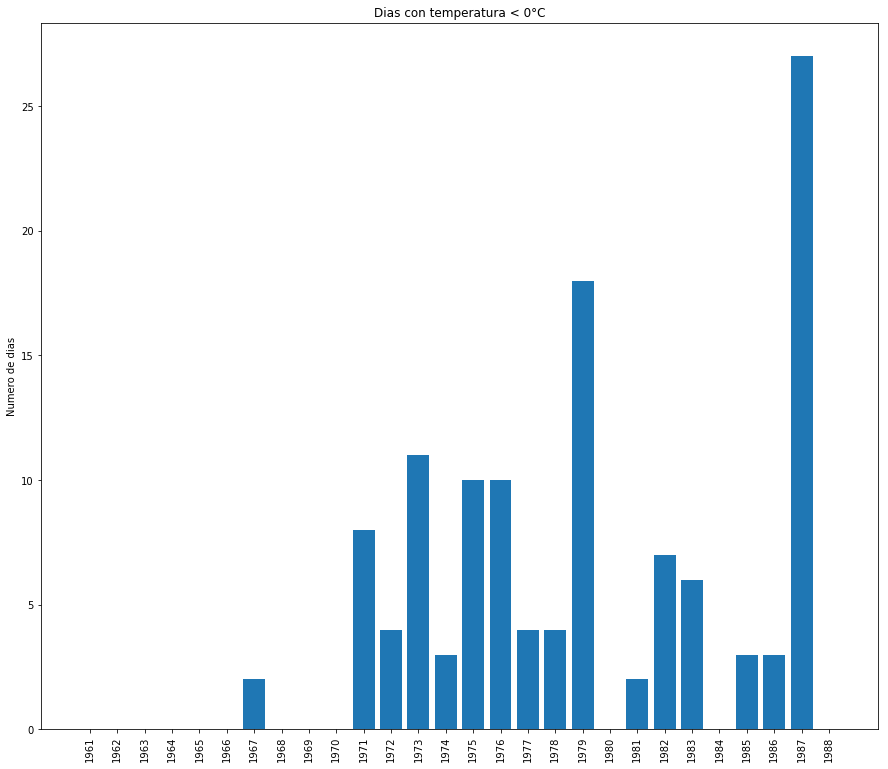

In [22]:
plt.figure(figsize = (15, 13))
plt.bar(np.arange(len(años)),FD)
plt.title("Dias con temperatura < 0°C")
plt.ylabel("Numero de dias")
plt.xticks(np.arange(len(años)), range(años[0],años[len(años)-1]+1), rotation = 90)
plt.show()

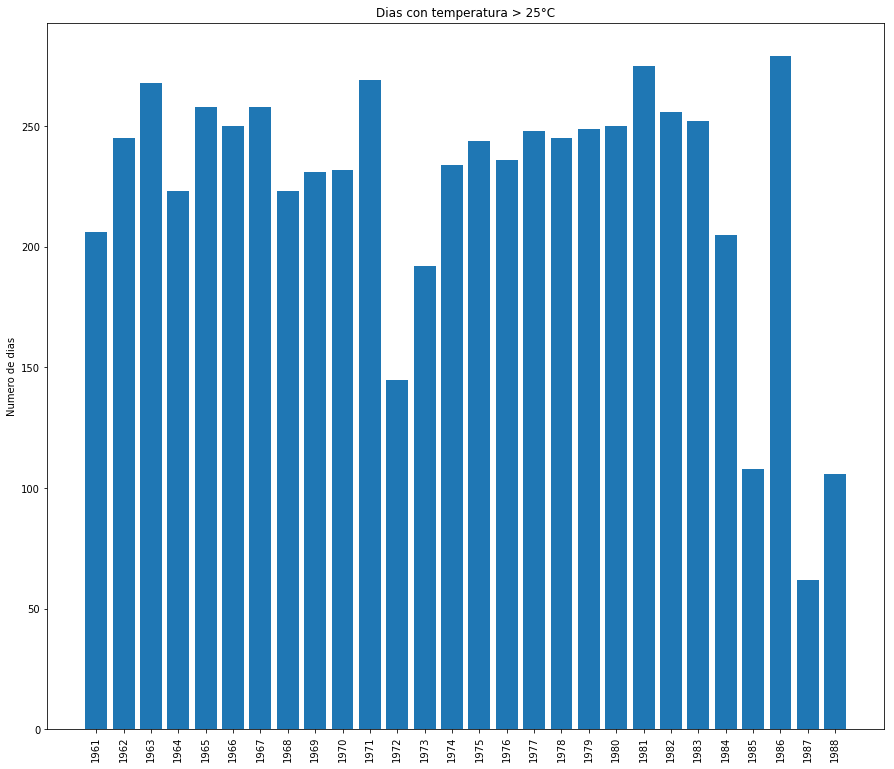

In [24]:
#Obtiene el numero de dias de verano por año
SU = []
ndias = 0
for i in range(df["Año"][0],df["Año"][len(df)-1]+1):
    dfaño = df[df["Año"] == i]
    for j in dfaño.index:
        if(dfaño["Tmax"][j] > 25):
            ndias = ndias+1
    SU.append(ndias)
    ndias = 0

plt.figure(figsize = (15, 13))
plt.bar(np.arange(len(años)),SU)
plt.title("Dias con temperatura > 25°C")
plt.ylabel("Numero de dias")
plt.xticks(np.arange(len(años)), range(años[0],años[len(años)-1]+1), rotation = 90)
plt.show()

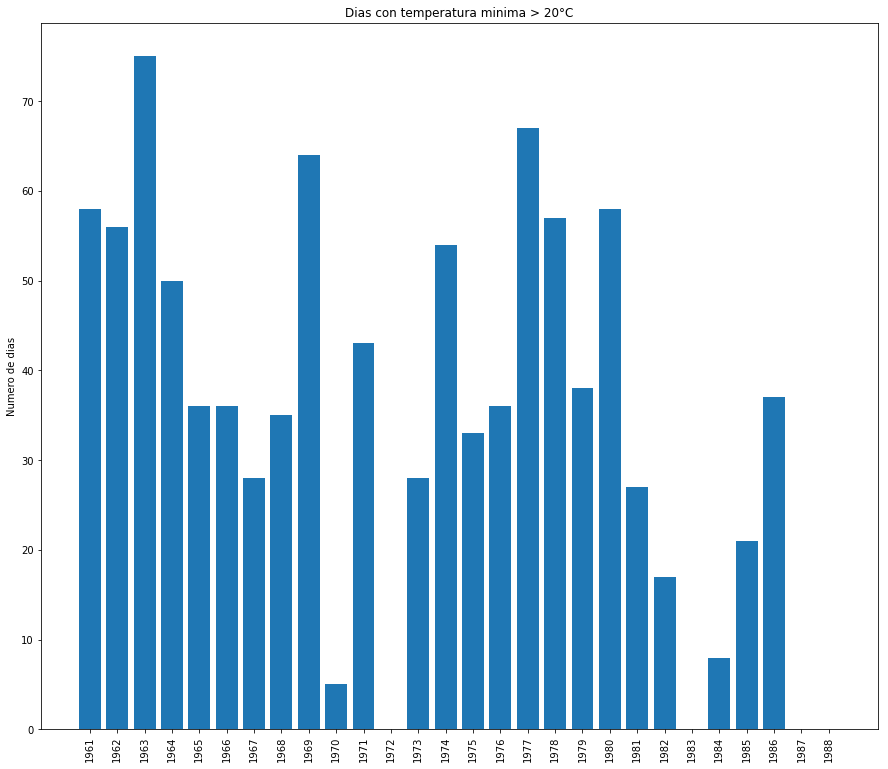

In [26]:

#Obtiene el numero de dias tropicales por año
TR = []
ndias = 0
for i in range(df["Año"][0],df["Año"][len(df)-1]+1):
    dfaño = df[df["Año"] == i]
    for j in dfaño.index:
        if(dfaño["Tmin"][j] > 20):
            ndias = ndias+1
    TR.append(ndias)
    ndias = 0
    
plt.figure(figsize = (15, 13))
plt.bar(np.arange(len(años)),TR)
plt.title("Dias con temperatura minima > 20°C")
plt.ylabel("Numero de dias")
plt.xticks(np.arange(len(años)), range(años[0],años[len(años)-1]+1), rotation = 90)
plt.show()

In [28]:
#Recorre la lista muchas veces para encontrar los días por cada año.
#Basicamente recorre la lista en secciones de 5 y si toda esa seccion cumple con 
#la condicion guarda los indices en un array y deja de buscar para ese año (el break)
#luego lo mete en otro array para guardarlos y cambia al siguiente año
todosPrimeros = []
seisPrimeros = -1
for j in range(df["Año"][0],df["Año"][len(df)-1]+1):
    dfaño = df[df["Año"]==j]
    for i in dfaño.index:
            if(dfaño["Tmed"][i]   > 5 and dfaño["Tmed"][i+1] > 5 and dfaño["Tmed"][i+2] > 5 and
               dfaño["Tmed"][i+3] > 5 and dfaño["Tmed"][i+4] > 5 and dfaño["Tmed"][i+5] > 5):
                seisPrimeros = i
                break
    if(seisPrimeros != -1):
        todosPrimeros.append(seisPrimeros)
        seisPrimeros = -1
    else:
        todosPrimeros.append(None)

In [30]:
#Y este es para encontrar los seis ultimos, es lo mismo que lo anterior pero de abajo hacia arriba
todosUltimos = []
seisUltimos = -1
for j in range(df["Año"][len(df)-1],df["Año"][0]-1,-1):
    dfaño = df[df["Año"]==j]
    indix = dfaño.index
    indix = indix[::-1]
    for i in range(0,len(indix)-5):
        if(df["Año"][i] == j):
            if(dfaño["Tmed"][indix[i]  ] < 5 and dfaño["Tmed"][indix[i+1]] < 5 and dfaño["Tmed"][indix[i+2]] < 5 and
               dfaño["Tmed"][indix[i+3]] < 5 and dfaño["Tmed"][indix[i+4]] < 5 and dfaño["Tmed"][indix[i+5]] < 5):
                seisUltimos = i-5
                break
    if(seisUltimos != -1):
        todosUltimos.append(seisUltimos)
        seisUltimos= -1
    else:
        todosUltimos.append(None)

#Como este array se creo leyendo la lista alrevez lo tengo que voltear para que los años del array todosPrimeros y todosUltimos concuerden
todosUltimos = todosUltimos[::-1]

In [31]:
GSL = []

for i in range(0,len(todosPrimeros)):
    if(todosUltimos[i]!= None and todosPrimeros[i] != None):
        GSL.append(todosUltimos[i]-todosPrimeros[i])
    else:
        GSL.append(365)

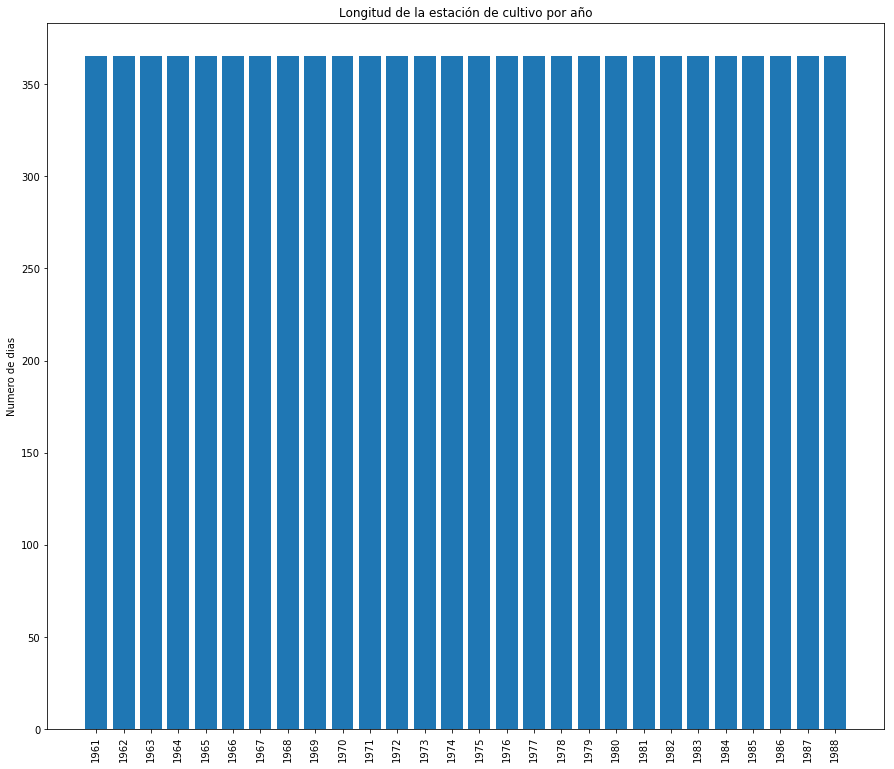

In [32]:
plt.figure(figsize = (15, 13))
plt.bar(np.arange(len(años)),GSL)
plt.title("Longitud de la estación de cultivo por año")
plt.ylabel("Numero de dias")
plt.xticks(np.arange(len(años)), range(años[0],años[len(años)-1]+1), rotation = 90)
plt.show()

In [42]:
def maxmensual(col,año1,año2):
    maximos = []
    maxi = -1000
    for n in range(año1,año2+1):
        dfaño = df[df["Año"]==n]
        for i in range(1,13):
            dfmes = dfaño[dfaño["Mes"]==i]
            for j in dfmes.index:
                if(dfmes[col][j]>maxi):
                    maxi = dfmes[col][j]
            if(maxi != -1000):
                maximos.append(maxi)
                maxi = -1000
            else:
                maximos.append(None)
    return maximos

def minmensual(col,año1,año2):
    minimos = []
    mini = 1000
    for n in range(año1,año2+1):
        dfaño = df[df["Año"]==n]
        for i in range(1,13):
            dfmes = dfaño[dfaño["Mes"]==i]
            for j in dfmes.index:
                if(dfmes[col][j]<mini):
                    mini = dfmes[col][j]
            if(mini != 1000):
                minimos.append(mini)
                mini = 1000
            else:
                minimos.append(None)
    return minimos     

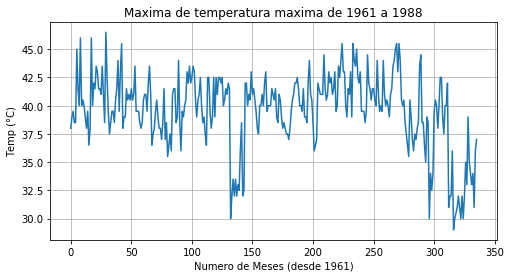

In [47]:
#Obtiene la maxima de temperatura maxima por mes de cada año.
TXx = maxmensual("Tmax",1961,df["Año"][len(df)-1])

#Si es que el array tiene datos None esta sección hace que se omitan en la gráfica y aparzca un linea entre el último dato conocido y el primer dato conocido.
TXx = np.array(TXx).astype(np.double)
s1mask = np.isfinite(TXx)

plt.figure(figsize = (8, 4))
plt.plot(np.arange(len(TXx))[s1mask],TXx[s1mask])
plt.title("Maxima de temperatura maxima de 1961 a 1988")
plt.ylabel("Temp (°C)")
plt.xlabel("Numero de Meses (desde 1961)")
plt.grid()
plt.show()

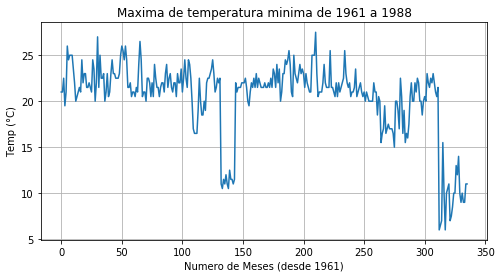

In [48]:
#Obtiene la maxima de temperatura minima por mes de cada año.
TNx = maxmensual("Tmin",1961,df["Año"][len(df)-1])

TNx = np.array(TNx).astype(np.double)
s1mask = np.isfinite(TNx)
plt.figure(figsize = (8, 4))
plt.plot(np.arange(len(TNx))[s1mask],TNx[s1mask])
plt.title("Maxima de temperatura minima de 1961 a 1988")
plt.ylabel("Temp (°C)")
plt.xlabel("Numero de Meses (desde 1961)")
plt.grid()
plt.show()

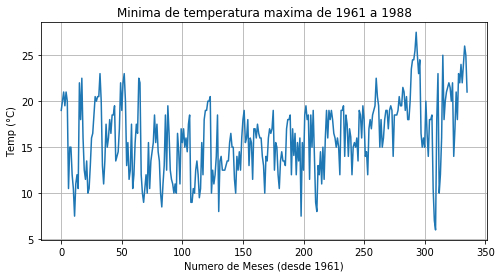

In [50]:

#Obtiene la minima de la temperatura maxima por mes de cada año
TXn = minmensual("Tmax",1961,df["Año"][len(df)-1])

TXn = np.array(TXn).astype(np.double)
s1mask = np.isfinite(TXn)
plt.figure(figsize = (8, 4))
plt.plot(np.arange(len(TXn))[s1mask],TXn[s1mask])
plt.title("Minima de temperatura maxima de 1961 a 1988")
plt.ylabel("Temp (°C)")
plt.xlabel("Numero de Meses (desde 1961)")
plt.grid()
plt.show()

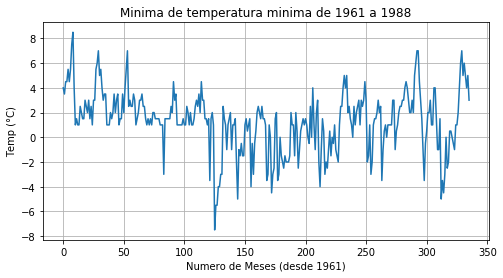

In [52]:
#Obtiene la minima de la temperatura maxima por mes de cada año
TNn = minmensual("Tmin",1961,df["Año"][len(df)-1])

plt.figure(figsize = (8, 4))
plt.plot(range(0,len(TNn)),TNn)
plt.title("Minima de temperatura minima de 1961 a 1988")
plt.ylabel("Temp (°C)")
plt.xlabel("Numero de Meses (desde 1961)")
plt.grid()
plt.show()

In [54]:
DTR = []
k = 0
prom = 0
for n in range(df["Año"][0],df["Año"][len(df)-1]+1):
    daño = df[df["Año"]==n]
    for j in range(1,13):
        dmes = daño[daño["Mes"]==j]
        for i in dmes.index:
            prom = prom + dmes["Tdif"][i]
            k = k+1
        if(k != 0):
            prom = prom/k
            DTR.append(prom)
            prom = 0
            k = 0
        else:
            DTR.append("NA")
        dmes = None

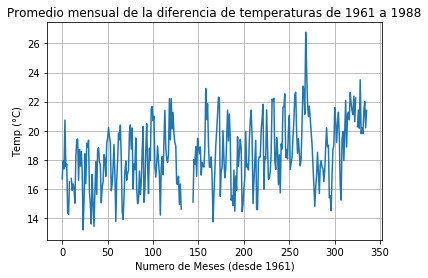

In [56]:

plt.plot(range(0,len(DTR)),DTR)
plt.title("Promedio mensual de la diferencia de temperaturas de 1961 a 1988")
plt.ylabel("Temp (°C)")
plt.xlabel("Numero de Meses (desde 1961)")
plt.grid()
plt.show()

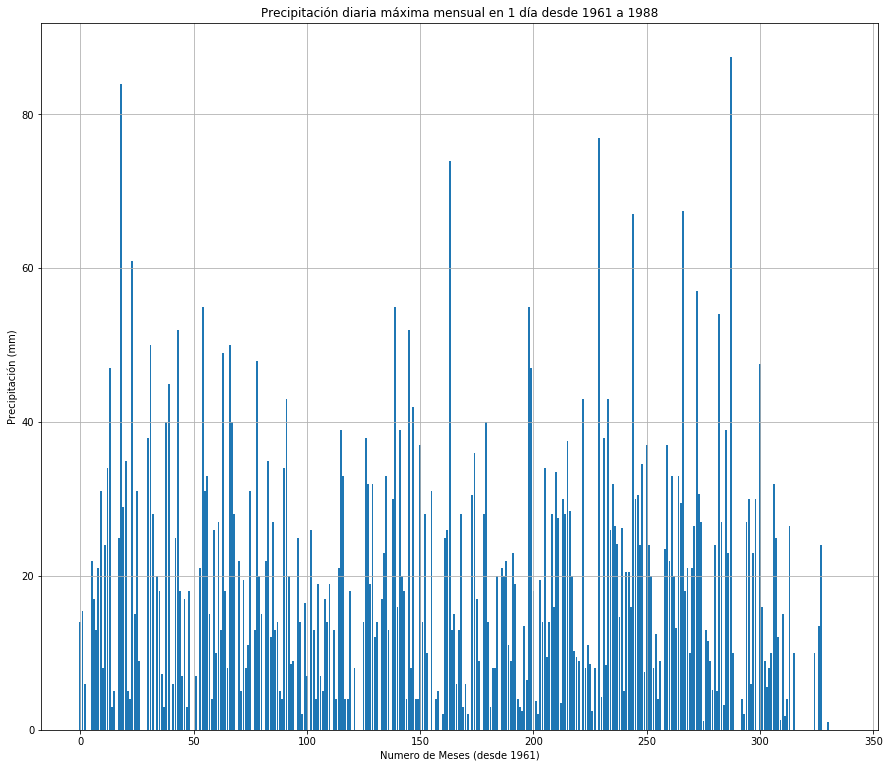

In [57]:

Rx1day = maxmensual("Precip",df["Año"][0],df["Año"][len(df)-1])

plt.figure(figsize = (15, 13))
plt.bar(np.arange(0,len(Rx1day)),Rx1day)
plt.title("Precipitación diaria máxima mensual en 1 día desde 1961 a 1988")
plt.ylabel("Precipitación (mm)")
plt.xlabel("Numero de Meses (desde 1961)")
plt.grid()
plt.show()

In [61]:
Rx5day = []
maximas = -1000

for n in range(df["Año"][0],df["Año"][len(df)-1]+1):
    dfaño = df[df["Año"]==n]
    for j in range(1,13):
        dfmes = dfaño[dfaño["Mes"] == j]
        indix = dfmes.index
        for i in range(0,len(indix)-4):
            temp = (dfmes["Precip"][indix[i+4]]+dfmes["Precip"][indix[i+3]]+
                    dfmes["Precip"][indix[i+2]]+dfmes["Precip"][indix[i+1]]+
                    dfmes["Precip"][indix[i]])
            if(maximas < temp):
                maximas = temp
        if(maximas != -1000):
            Rx5day.append(maximas)
            maximas = -1000
        else:
            Rx5day.append(None)

In [65]:
#Obtiene el numero de dias con precipitacion mayor a 1mm por año
SDII = []
ndias = 0
for i in range(df["Año"][0],df["Año"][len(df)-1]+1):
    dfaño = df[df["Año"] == i]
    for j in dfaño.index:
        if(dfaño["Precip"][j] >= 1):
            ndias = ndias+1
    SDII.append(ndias)
    ndias = 0

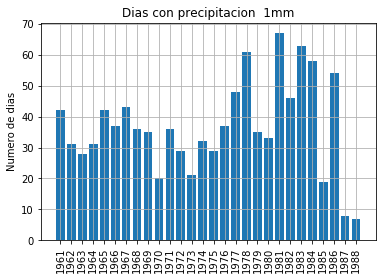

In [66]:
plt.bar(np.arange(len(años)),SDII)
plt.title("Dias con precipitacion  1mm")
plt.ylabel("Numero de dias")
plt.xticks(np.arange(len(años)), range(años[0],años[len(años)-1]+1), rotation = 90)
plt.grid()
plt.show()

In [68]:

#Obtiene el numero de dias con precipitacion mayor a 10mm por año
R10mm = []
ndias = 0
for i in range(df["Año"][0],df["Año"][len(df)-1]+1):
    dfaño = df[df["Año"] == i]
    for j in dfaño.index:
        if(dfaño["Precip"][j] >= 10):
            ndias = ndias+1
    R10mm.append(ndias)
    ndias = 0

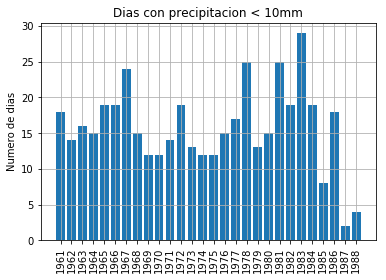

In [69]:

plt.grid()
plt.bar(np.arange(len(años)),R10mm)
plt.title("Dias con precipitacion < 10mm")
plt.ylabel("Numero de dias")
plt.xticks(np.arange(len(años)), range(años[0],años[len(años)-1]+1), rotation = 90)
plt.show()

In [70]:

#Obtiene el numero de dias con precipitacion mayor a 20mm por año
R20mm = []
ndias = 0
for i in range(df["Año"][0],df["Año"][len(df)-1]+1):
    dfaño = df[df["Año"] == i]
    for j in dfaño.index:
        if(dfaño["Precip"][j] >= 20):
            ndias = ndias+1
    R20mm.append(ndias)
    ndias = 0

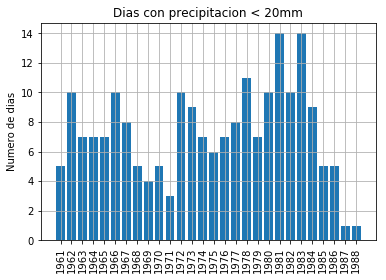

In [71]:

plt.bar(np.arange(len(años)),R20mm)
plt.title("Dias con precipitacion < 20mm")
plt.ylabel("Numero de dias")
plt.xticks(np.arange(len(años)), range(años[0],años[len(años)-1]+1), rotation = 90)
plt.grid()
plt.show()

In [73]:

#Obtiene el número de días consecutivos secos por año. Los dias secps son dias sin precipitación o precipitación < 1mm.
CDD = []
ndias = 0
temp = 0
for i in range(df["Año"][0],df["Año"][len(df)-1]+1):
    dfaño = df[df["Año"] == i]
    for j in dfaño.index:
        if(dfaño["Precip"][j]<1):
            temp = temp+1
        elif(dfaño["Precip"][j]>=1):
            if(temp > ndias):
                ndias = temp
                temp = 0
            else:
                temp = 0
    CDD.append(ndias)
    ndias = 0
    temp = 0

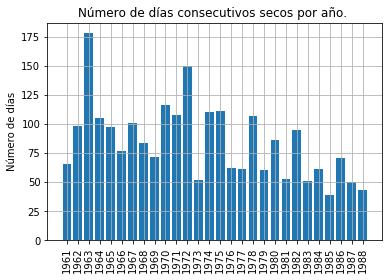

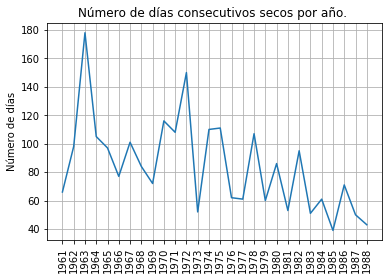

In [74]:
plt.bar(np.arange(len(años)),CDD)
plt.title("Número de días consecutivos secos por año. ")
plt.ylabel("Número de días")
plt.xticks(np.arange(len(años)), range(años[0],años[len(años)-1]+1), rotation = 90)
plt.grid()
plt.show()

plt.plot(np.arange(len(años)),CDD)
plt.title("Número de días consecutivos secos por año. ")
plt.ylabel("Número de días")
plt.xticks(np.arange(len(años)), range(años[0],años[len(años)-1]+1), rotation = 90)
plt.grid()
plt.show()

In [76]:
#Obtiene el número de días consecutivos humedos por año. Los dias secps son dias conn precipitación >= a 1mm.
CWD = []
ndias = 0
temp = 0
for i in range(df["Año"][0],df["Año"][len(df)-1]+1):
    dfaño = df[df["Año"]==i]
    for j in dfaño.index:
        if(dfaño["Precip"][j]>= 1):
            temp = temp+1
        elif(dfaño["Precip"][j] < 1):
            if(temp > ndias):
                ndias = temp
                temp = 0
            else:
                temp = 0
    CWD.append(ndias)
    ndias = 0
    temp = 0

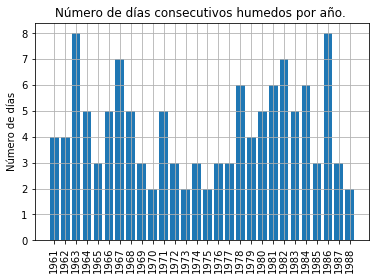

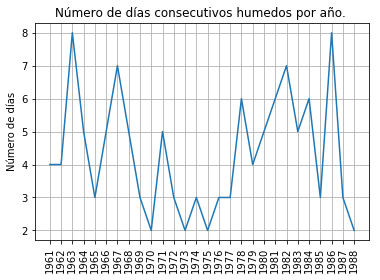

In [77]:

plt.bar(np.arange(len(años)),CWD)
plt.title("Número de días consecutivos humedos por año. ")
plt.ylabel("Número de días")
plt.xticks(np.arange(len(años)), range(años[0],años[len(años)-1]+1), rotation = 90)
plt.grid()
plt.show()

plt.plot(np.arange(len(años)),CWD)
plt.title("Número de días consecutivos humedos por año. ")
plt.ylabel("Número de días")
plt.xticks(np.arange(len(años)), range(años[0],años[len(años)-1]+1), rotation = 90)
plt.grid()
plt.show()